<a href="https://colab.research.google.com/github/ajrianop/Estadistica_Descriptiva_y_Python_UD2023-3/blob/main/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando librerías utiles para el desarrollo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Funciones de distribución
# Funciones a utilizar

def arithmetic_mean(values : list):
  '''
  Función que permite calcular la media aritmética
  values --> list
  '''
  _sum = 0
  n = len(values)

  for value in values:
      _sum += value  # _sum = _sum + value

  return _sum / n


def geometric_mean(values : list):
  '''
  Función que permite calcular la media geométrica
  values --> list
  '''
  product = 1
  n = len(values)

  for value in values:
      product *= value

  return (product ** (1 / n))

def harmonic_mean(values : list):
  '''
  Función que permite calcular la media armónica
  values --> list
  '''
  _sum = 0
  n = len(values)

  for value in values:
      _sum += 1/value  # Convierte el porcentaje a decimal

  return n/_sum


def quadratic_mean(values : list):
  '''
  Función que permite calcular la media cuadrática
  values --> list
  '''
  _sum = 0
  n = len(values)

  for value in values:
      _sum += value ** 2  # Convierte el porcentaje a decimal

  return (_sum/n)** 0.5


def mid_range(values : list):
  '''
  Función que permite calcular rango medio
  values --> list
  '''
  _min = min(values)
  _max = max(values)

  return ( _min + _max )/2

def median(values : list):
  '''
  Función que permite calcular la mediana
  values --> list
  '''
  n = len(values)
  if n % 2 == 1:
      mediana = values[n // 2]
  else:
      mediana = (values[(n - 1) // 2] + values[n // 2]) / 2
  return mediana

from collections import Counter

def mode(values : list):
  '''
  Función que permite calcular la moda
  values --> list
  '''
  # Se genera la clase counter que tiene un diccionario organizado de mayor a menor por cantidad de votos
  # {key : value}  ---> key : puntuacion ,  value: cantidad de veces repetida la puntuacion
  contador_frecuencia = Counter(values)
  # Generar una lista de tuplas (dato , votación de ese dato)
  modas_resultados = contador_frecuencia.most_common()

  # Obtener los valores de las modas y sus frecuencias
  modas = [moda[0] for moda in modas_resultados if moda[1] == modas_resultados[0][1]]
  frecuencia_maxima = modas_resultados[0][1]
  return modas , frecuencia_maxima

# Medidas de dispersión

def range_func(values : list):
  '''
  Función rango de estadística, la cual consifera punto máximo y mínimo de
  la lista y calcula su diferencia.
  values ---> list
  '''
  return max(values)-min(values)

def mean_deviation(values : list):
  '''
  Función desviación media, la cuál permite ver que tan dispersa esta la
  información con respecto a la media (media aritmética)
  values ---> list
  '''
  _sum = 0
  _mean = arithmetic_mean(values)
  n = len(values)
  for value in values:
    _sum += abs(value - _mean)
  return _sum / n

def variance(datos):
  '''
  Función varianza, la cuál permite ver que tan dispersa esta la
  información con respecto a la media (media aritmética), en este caso con el
  cuadrado de la diferencia.
  values ---> list
  '''
  media = sum(datos) / len(datos)
  varianza = sum((x - media) ** 2 for x in datos) / (len(datos) - 1)
  return varianza

def standard_deviation(values : list):
  '''
  Función desviación estándar, la cuál permite ver que tan dispersa esta la
  información con respecto a la media (media aritmética).
  values ---> list
  '''
  return variance(values) ** (1/2)

def coefficient_of_variation(values : list):
  '''
  Función de coeficientes de variación dados unos valores iniciales.
  Note que el resultado es un porcentaje.
  values ---> list
  '''
  _mean = arithmetic_mean(values)
  _std = standard_deviation(values)

  return (_std  / _mean ) * 100

## Punto 1
Se ha registrado el número de accidentes por día en una interscción en alguna parte de la ciudad. Nos has solicitado revisemos la distribución de frecuencias dados los siguientes datos:  1, 0, 2, 3, 1, 1, 0, 2, 1, 3, 2, 1, 0, 1, 2, 2, 3, 0, 1, 1.

1. Realice la tabla de frecuencias del problema y cálcule la media, mediana, desviación estándar y el coeficiente  de variación.
2. Realice un gráfico de la frecuencia absoluta, y otro de la frecuencia relativa acumulada.

### Solución punto 1

In [ ]:
# Función que genera el dataframe de tabla de frecuencias
def tabla_frecuencias(lista, nombre_var):
  '''
  Función que genera tabla de frecuencias con parametros:
  df ---> DataFrame
  lista ---> list : lista de datos
  nombre_var ---> str : nombre de las variables
  '''
  df1 = pd.DataFrame(lista, columns=[nombre_var])
  # Calcular la frecuencia absoluta
  tabla1 = df1[nombre_var].value_counts().reset_index()
  tabla1.columns = [nombre_var, 'Frecuencia Absoluta']
  # Ordenar por nombre_var
  tabla1 = tabla1.sort_values(by=nombre_var)
  # Calcular la frecuencia absoluta acumulada
  tabla1['Frecuencia Absoluta Acumulada'] = tabla1['Frecuencia Absoluta'].cumsum()
  total_var = len(lista)
  tabla1['Frecuencia Relativa %'] = ( tabla1['Frecuencia Absoluta'] / total_var ) * 100
  # Calcular la frecuencia relativa acumulada
  tabla1['Frecuencia Relativa Acumulada %'] = tabla1['Frecuencia Relativa %'].cumsum()
  return tabla1

In [ ]:
# Se llaman los datos
accidentes = [1, 0, 2, 3, 1, 1, 0, 2, 1, 3, 2, 1, 0, 1, 2, 2, 3, 0, 1, 1]
# Función que genera la tabla de frecuencias
tabla_frecuencias1 = tabla_frecuencias(accidentes, 'accidentes')
tabla_frecuencias1

,accidentes,Frecuencia Absoluta,Frecuencia Absoluta Acumulada,Frecuencia Relativa %,Frecuencia Relativa Acumulada %
2,0,4,4,20.0,20.0
0,1,8,12,40.0,60.0
1,2,5,17,25.0,85.0
3,3,3,20,15.0,100.0


In [ ]:
# Definimos una función con todas las medidas de tendencia central vistas en clase:

def calculo_med_tend_central(values : list, comentario : str):
  '''
  Función que cálcula:
  Media Aritmética
  Media Geométrica
  Media Armónica
  Media Cuadrática
  Rango Medio
  Mediana
  Moda
  '''
  _dict = dict()
  ari_mean = arithmetic_mean(values) #media
  _median = median(values) # mediana
  _standard_deviation = standard_deviation(values) #desviacion estandar
  coef_var = coefficient_of_variation(values) #coeficiente de variación

  dict_measures = {"arithmetic_mean" :ari_mean ,  "median" : _median , "standard deviation" : _standard_deviation , "coefficient of variation" : coef_var , "comentario" : comentario}
  for i in dict_measures:
    _dict[i] = dict_measures[i]

  return _dict

In [ ]:
calculo_med_tend_central(accidentes, 'Accidentes')

{'arithmetic_mean': 1.35,
 'median': 2.5,
 'standard deviation': 0.9880869341680842,
 'coefficient of variation': 73.19162475319142,
 'comentario': 'Accidentes'}

### Solución punto 2

In [ ]:
# datos a estudiar
datos = tabla_frecuencias1['accidentes'].to_list()

# frecuencia obsoluta
frecuencia_absoluta = tabla_frecuencias1['Frecuencia Absoluta'].to_list()

# frecuencia relativa acumulada
frecuencia_relativa_acumulada = tabla_frecuencias1['Frecuencia Relativa Acumulada %'].to_list()

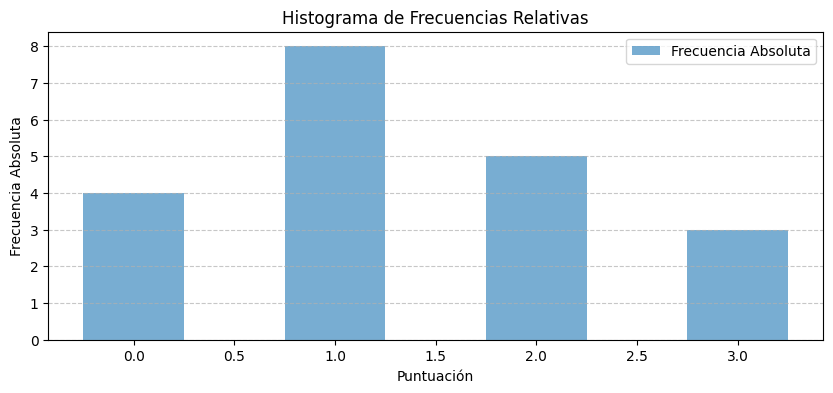

In [ ]:
# Crear el histograma de frecuencias
plt.figure(figsize=(10, 4))
plt.bar(datos, frecuencia_absoluta, width=0.5, alpha=0.6, align='center', label='Frecuencia Absoluta')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Relativas')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

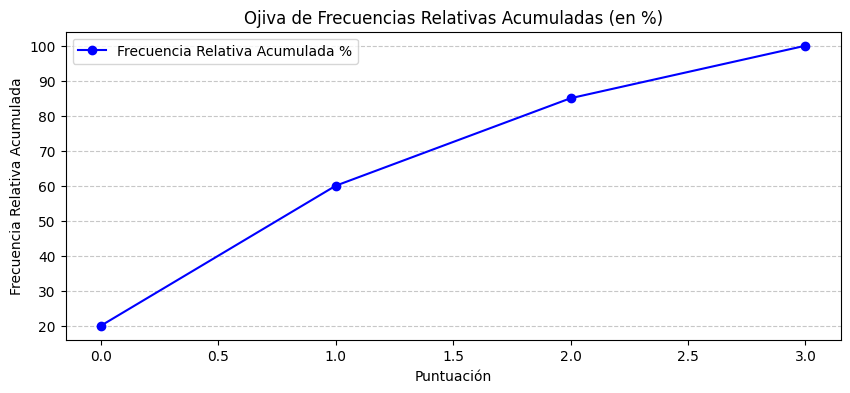

In [ ]:
# Crea gráfico de barras para las frecuencias absolutas acumuladas
frecuencia_relativa_acumulada = tabla_frecuencias1['Frecuencia Relativa Acumulada %'].to_list()

plt.figure(figsize=(10, 4))
plt.plot(datos, frecuencia_relativa_acumulada, marker='o', linestyle='-', color='b', label='Frecuencia Relativa Acumulada %')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia Relativa Acumulada')
plt.title('Ojiva de Frecuencias Relativas Acumuladas (en %)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Punto 2
En un proyecto de construcción de un edificio de gran altura, los ingenieros están interesados en evaluar los tiempos de construcción (en días) de estructuras similares en la misma ciudad para establecer un cronograma realista para su propio proyecto. Han recopilado datos de tiempos de construcción de 50 edificios de altura similar.

Los datos recopilados son los siguientes: 185, 190, 195, 200, 210, 205, 198, 215, 202, 220, 225, 198, 205, 190, 212, 208, 195, 200, 204, 198, 213, 209, 189, 223, 205, 199, 190, 217, 202, 198, 207, 210, 225, 198, 205, 209, 211, 200, 189, 215, 207, 199, 198, 205, 212, 220, 195, 210.

1. Encuentre el rango de los datos, y realice la tabla de frecuencias del problema dividiendo el intervalo de estudio en 6 partes iguales. Cálcule el valor de asímetria y kurtosis del problema (explicar como los calculo).
2. Dado que la variable es continua, utilizar las fórmulas vistas en clase para determinar el valor mínimo los cuartiles $Q_1$, $Q_2$, $Q_3$ y el valor máximo.

In [ ]:
# Rango de los datos
tiempos = [185, 190, 195, 200, 210, 205, 198, 215, 202, 220, 225, 198, 205, 190, 212, 208, 195, 200, 204, 198, 213, 209, 189, 223, 205, 199, 190, 217, 202, 198, 207, 210, 225, 198, 205, 209, 211, 200, 189, 215, 207, 199, 198, 205, 212, 220, 195, 210]

_min = min(tiempos)
_max = max(tiempos)
rango = _max - _min
print(f'el valor mínimo es {_min} y el valor máximo es {_max}, de este modo el rango es {rango}')

el valor mínimo es 185 y el valor máximo es 225, de este modo el rango es 40


Dado que el rango es 40, y vamos a considerar 6 intervalos de estudio, tenemo que

In [ ]:
numero_particion = round(rango/6, 0)
numero_particion

7.0

In [ ]:
val = _min
_list = [_min]
_bool = True
while _bool:
  if (val - _max) < numero_particion and (val - _max) > 0:
    break
  else:
    val = val + int(numero_particion)
    _list.append(val)

# Intervalos de estudio
_list

[185, 192, 199, 206, 213, 220, 227]

In [ ]:
# Definir los límites de los intervalos
intervalos = _list

# Crear un DataFrame vacío para la tabla de distribución de frecuencias
tabla_frecuencias = pd.DataFrame(columns=['Intervalo de Puntuación', 'Marca de Clase', 'Frecuencia Absoluta'])

# Calcular la frecuencia absoluta para cada intervalo
frecuencia_absoluta = np.histogram(tiempos, bins=intervalos)[0]

# Agregar los datos al DataFrame
tabla_frecuencias['Intervalo de Puntuación'] = [f'{a}-{b}' for a, b in zip(intervalos[:-1], intervalos[1:])]
tabla_frecuencias['Marca de Clase'] = [(a + b ) / 2 for a, b in zip(intervalos[:-1], intervalos[1:])]
tabla_frecuencias['Frecuencia Absoluta'] = frecuencia_absoluta

# Calcular la frecuencia absoluta acumulada
tabla_frecuencias['Frecuencia Absoluta Acumulada'] = tabla_frecuencias['Frecuencia Absoluta'].cumsum()

# Calcular la frecuencia relativa
total_estudiantes = len(tiempos)
tabla_frecuencias['Frecuencia Relativa'] = tabla_frecuencias['Frecuencia Absoluta'] / total_estudiantes * 100

# Calcular la frecuencia relativa acumulada
tabla_frecuencias['Frecuencia Relativa Acumulada'] = tabla_frecuencias['Frecuencia Relativa'].cumsum()

# Mostrar la tabla de distribución de frecuencias
tabla_frecuencias

,Intervalo de Puntuación,Marca de Clase,Frecuencia Absoluta,Frecuencia Absoluta Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
0,185-192,188.5,6,6,12.500000,12.500000
1,192-199,195.5,9,15,18.750000,31.250000
2,199-206,202.5,13,28,27.083333,58.333333
3,206-213,209.5,11,39,22.916667,81.250000
4,213-220,216.5,4,43,8.333333,89.583333
5,220-227,223.5,5,48,10.416667,100.000000


Para encontrar la asimetría y la curtosis tenemos que hallar la media, la moda y la desviación estandar.

In [ ]:
media = sum(tiempos)/len(tiempos)
moda = mode(tiempos)
desviacion_estandar = standard_deviation(tiempos)

print(f'Media : {media}')
print(f'Moda: {moda}')
print(f'Desviación estandar: {desviacion_estandar}')


# Asimetría = (media - moda) / s
asimetria = (media - moda[0][0]) / desviacion_estandar

# Curtosis  = sum (x -\bar(x))/ (ns^4)}
tiempos_curtosis = [(x - media)**4 for x in tiempos]
curtosis = sum(tiempos_curtosis) /(len(tiempos) * desviacion_estandar ** 4)

print(f'asimetria :{asimetria} y curtosis : {curtosis}' )

Media : 204.47916666666666
Moda: ([198], 6)
Desviación estandar: 9.86502436255273
asimetria :0.6567816184277594 y curtosis : 2.383014802439596


In [ ]:
tabla_frecuencias['fi * marca_clase'] = tabla_frecuencias['Frecuencia Absoluta'] * tabla_frecuencias['Marca de Clase']
media2 = sum(tabla_frecuencias['fi * marca_clase'])/sum(tabla_frecuencias['Frecuencia Absoluta'])
d1 = abs(13-9)
d2 = abs(13-11)
moda2 = 199 + (d1 /(d1+d2)) * numero_particion
tabla_frecuencias['marca_clase-media'] = tabla_frecuencias['Marca de Clase'] - media2
desviacion_estandar2 = ((sum(tabla_frecuencias['marca_clase-media'])) / (sum(tabla_frecuencias['Frecuencia Absoluta'])-1) )** (0.5)

print(f'Media : {media2}')
print(f'Moda: {moda2}')
print(f'Desviación estandar: {desviacion_estandar2}')

# Asimetría = (media - moda) / s
asimetria2 = (media2 - moda2) / desviacion_estandar2

# Curtosis  = sum (x -\bar(x))/ (ns^4)}
tabla_frecuencias['fi* (marca_clase-media)^4'] = tabla_frecuencias['Frecuencia Absoluta']* (tabla_frecuencias['marca_clase-media'])**4
tiempos_curtosis2 = tabla_frecuencias['fi* (marca_clase-media)^4']
curtosis2 = sum(tiempos_curtosis2) /((len(tiempos) * (desviacion_estandar2) ** 4))

print(f'asimetria :{asimetria2} y curtosis : {curtosis2}' )

Media : 204.39583333333334
Moda: 203.66666666666666
Desviación estandar: 0.45253423521602426
asimetria :1.6112961405419561 y curtosis : 595597.2504588447


In [ ]:
# Cálculo de valor máximo , cuartil 1, 2, 3 y valor mínimo

_min = min(tiempos)
q1 = 192 + ((0.25 - 0.125)/0.1825) * numero_particion
q2 = 199 + ((0.5 - 0.3125)/0.2708) * numero_particion
q3 = 206 + ((0.75 - 0.5833)/0.2292) * numero_particion
_max = max(tiempos)

cuartiles = [_min , q1 , q2 , q3 , _max]
cuartiles

[185, 196.7945205479452, 203.8467503692762, 211.0911867364747, 225]

In [ ]:
# cercos
RIC = q3 - q1

c1 = q1 - 3 * RIC
c2 = q1 - 1.5 * RIC
c3 = q3 + 1.5 * RIC
c4 = q3 + 3 * RIC
cercos = [ c1 ,  c2 , q1 , q2 , q3 , c3 , c4]

cercos

[153.90452198235675,
 175.349521265151,
 196.7945205479452,
 203.8467503692762,
 211.0911867364747,
 232.53618601926894,
 253.98118530206315]

In [ ]:
# Cálculo de valor máximo , cuartil 1, 2, 3 y valor mínimo

_min = min(tiempos)
D1 = 185 + ((0.1 * (1) - 0)/0.125) * numero_particion
D2 = 192 + ((0.1 * (2) - 0.125)/ 0.1875) * numero_particion
D3 = 192 + ((0.1 * (3) - 0.125)/ 0.1875) * numero_particion
D4 = 199 + ((0.1 * (4) - 0.3125)/ 0.2703) * numero_particion
D5 = 199 + ((0.1 * (5) - 0.3125)/ 0.2703) * numero_particion
D6 = 206 + ((0.1 * (6) - 0.5833)/ 0.2292) * numero_particion
D7 = 206 + ((0.1 * (7) - 0.5833)/ 0.2292) * numero_particion
D8 = 206 + ((0.1 * (8) - 0.5833)/ 0.2292) * numero_particion
D9 = 220 + ((0.1 * (9) - 0.8958)/ 0.1042) * numero_particion
_max = max(tiempos)

cuartiles = [_min , D1 , D2 , D3 , D4 , D5 , D7 , D8 , D9 , _max]
cuartiles

[185,
 190.6,
 194.8,
 198.53333333333333,
 201.2660007399186,
 203.85571587125418,
 209.56413612565444,
 212.61823734729495,
 220.28214971209212,
 225]